# Introduction to complex networks theory
## Lesson 3: Numpy

The goal of this notebook is to cover a few math refresher topics with the [numpy](https://numpy.org/) library, specially:
- matrices
- random numbers
- mean/median/mode/variance/standard deviation
- histograms

So let's start!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Matrices

Last time we covered lists of lists, so can we use them as matrices?

In [2]:
a = [[1,2,3],[4,5,6]]
a

[[1, 2, 3], [4, 5, 6]]

In [3]:
a[0][1]

2

Tnis seems like a 2x3 matrix, but can we do things we could do with a matrix, say multiply this matrix with a number?

In [4]:
3*a

[[1, 2, 3], [4, 5, 6], [1, 2, 3], [4, 5, 6], [1, 2, 3], [4, 5, 6]]

We can, but we don't get the result we expect. When a list is multiplied with a number, python makes copies of lists and join them together. That can be useful sometimes, but that is not behavivour we want when we search for matrix representation in python.

Another problem:

In [5]:
3.2*a

TypeError: can't multiply sequence by non-int of type 'float'

Yet another problem:

In [6]:
a = [[1,2,3],[4,5,6]]
b = [[8,3,4],[6,7,1]]
a+b

[[1, 2, 3], [4, 5, 6], [8, 3, 4], [6, 7, 1]]

So we need another solution, numpy arrays:

In [7]:
np.array(a)

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
new_a = np.array(a)

In [9]:
new_a[1,2]

6

In [10]:
3*new_a

array([[ 3,  6,  9],
       [12, 15, 18]])

In [11]:
3.2*new_a

array([[ 3.2,  6.4,  9.6],
       [12.8, 16. , 19.2]])

In [12]:
new_b = np.array([[8,3,4],[6,7,1]])
new_a+new_b

array([[ 9,  5,  7],
       [10, 12,  7]])

Summation:

In [13]:
sum(a)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

we can't just simply sum multidimensional list, we either need to sum row by row or loop through elements

In [14]:
new_a.sum()

21

In [15]:
new_a.sum(axis=0)

array([5, 7, 9])

In [16]:
new_a.sum(axis=1)

array([ 6, 15])

Applying functions to matrices:

In [17]:
np.sqrt(new_a)

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

#### Random numbers

In [18]:
?np.random

Function `np.random.rand` generates a random number between 0 and 1:

In [19]:
np.random.rand()

0.6092429995166719

Passing it the number of samples you can get an array or a matrix of random numbers:

In [20]:
np.random.rand(100)

array([0.75745726, 0.64540107, 0.73602099, 0.12535285, 0.33897256,
       0.78102392, 0.55569106, 0.45700212, 0.65261878, 0.64739576,
       0.98097783, 0.19088802, 0.89880255, 0.5737551 , 0.90363541,
       0.52283674, 0.00760993, 0.12653801, 0.15118865, 0.49084007,
       0.5458094 , 0.65650754, 0.75469451, 0.08558432, 0.44120781,
       0.32025485, 0.46455968, 0.15135067, 0.33001541, 0.51436801,
       0.36865432, 0.39434548, 0.07493826, 0.4268958 , 0.8057299 ,
       0.64237067, 0.70216697, 0.52969689, 0.75042867, 0.79494831,
       0.64986038, 0.45374842, 0.49924226, 0.80770988, 0.12016263,
       0.1338427 , 0.92964616, 0.83399785, 0.7417273 , 0.12999954,
       0.4554705 , 0.92489879, 0.11866318, 0.63169727, 0.62373061,
       0.04922976, 0.53426753, 0.63376835, 0.12219112, 0.14461208,
       0.01205825, 0.88969405, 0.36775081, 0.75502736, 0.97039601,
       0.99924516, 0.33555621, 0.44489495, 0.77160715, 0.12027165,
       0.79275576, 0.73229675, 0.49628783, 0.85705599, 0.25078

This function we typically use when we want to 'simulate' coin tosses, or another random event that we expect to happen with a certain fixed probability. For example, every time a random number if les or equal than 0.5, we'll say head appeared:

In [21]:
np.random.rand(10)

array([0.00868138, 0.37719917, 0.51562669, 0.49297357, 0.94909612,
       0.0468971 , 0.5950978 , 0.13091572, 0.8598761 , 0.73044083])

In [22]:
np.random.rand(10)<=0.5

array([ True, False,  True, False, False,  True,  True, False,  True,
       False])

We can sum those to check how many heads we got:

In [23]:
(np.random.rand(10)<=0.5).sum()

6

Let's create a larger sample of these random numbers so that we can calculate some basic statistics on them:

In [24]:
sample = np.random.rand(500)

In [25]:
sample.mean(), sample.sum()/sample.size

(0.49840325265990615, 0.49840325265990615)

In [26]:
np.median(sample)

0.47835781702422175

In [27]:
np.var(sample)

0.08752352050347946

In [28]:
np.std(sample)

0.2958437433907965

In [29]:
np.quantile(sample,0.9)

0.9146015590235761

In [30]:
?np.histogram

In [31]:
np.histogram(sample)

(array([54, 52, 47, 56, 51, 46, 38, 48, 48, 60]),
 array([0.00293553, 0.10256632, 0.2021971 , 0.30182789, 0.40145867,
        0.50108945, 0.60072024, 0.70035102, 0.79998181, 0.89961259,
        0.99924338]))

(array([54., 52., 47., 56., 51., 46., 38., 48., 48., 60.]),
 array([0.00293553, 0.10256632, 0.2021971 , 0.30182789, 0.40145867,
        0.50108945, 0.60072024, 0.70035102, 0.79998181, 0.89961259,
        0.99924338]),
 <BarContainer object of 10 artists>)

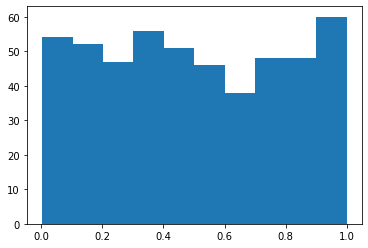

In [32]:
plt.hist(sample)

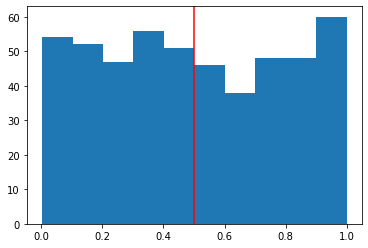

In [33]:
plt.hist(sample)
plt.axvline(x=np.mean(sample),color='red')

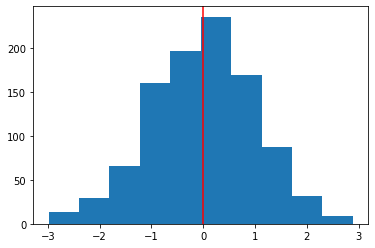

In [34]:
n_sample = np.random.randn(1000)

plt.hist(n_sample)
plt.axvline(x=np.mean(n_sample),color='red')

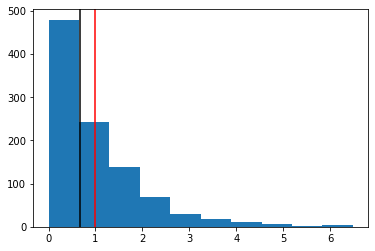

In [35]:
e_sample = np.random.exponential(1,1000)

plt.hist(e_sample)
plt.axvline(x=np.mean(e_sample),color='red')
plt.axvline(x=np.median(e_sample),color='black')